# FSPS to generate Spectral Energy Distributions of galaxies
Scratch pad to figure out how to use FSPS to generate SEDs of galaxies

In [23]:
import fsps
from sedpy.observate import getSED
from sedpy.observate import load_filters

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from ChangTools.plotting import prettyplot
from ChangTools.plotting import prettycolors

In [32]:
# cosmology
from astropy.cosmology import FlatLambdaCDM
cosmo = FlatLambdaCDM(H0=70, Om0=0.3)

In [3]:
prettyplot()
pretty_colors = prettycolors()

In [24]:
# some constants
lsun = 3.846e33
pc = 3.085677581467e18 # cm
lightspeed = 2.998e18 # AA/s
to_cgs = lsun/(4.*np.pi * (pc * 10)**2)

## Lets first try to generate a single SSP

In [4]:
pop = fsps.StellarPopulation(zcontinuous=1)

In [5]:
default_params = dict([(k, pop.params[k]) for k in pop.params.all_params])

In [6]:
# single SSP 
pop.params['sfh'] = 0 # not convolved with SFH
wave, space = pop.get_spectrum(tage=1., peraa=True)

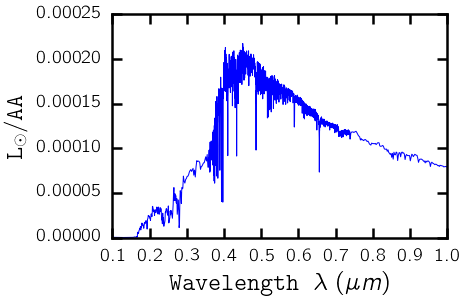

In [7]:
plt.plot(wave/1e4, space)
plt.xlim([0.1, 1.0])
plt.xlabel('Wavelength $\lambda\; (\mu m)$', fontsize=25)
plt.ylabel('$\mathtt{L_\odot/AA}$', fontsize=25)

In [8]:
# reset parameters
for k in pop.params.all_params:
    pop.params[k] = default_params[k]

## Now a Composite Stellar Population (CSP) a.k.a. a galaxy

In [9]:
pop.params['sfh'] = 1
pop.params['tau'] = 1.
wave, space = pop.get_spectrum(tage=1., peraa=True)

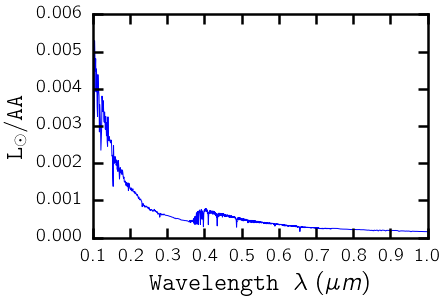

In [10]:
plt.plot(wave/1e4, space)
plt.xlim([0.1, 1.0])
plt.xlabel('Wavelength $\lambda\; (\mu m)$', fontsize=25)
plt.ylabel('$\mathtt{L_\odot/AA}$', fontsize=25)

In [17]:
['sdss_{0}0'.format(b) for b in ['u','g','r','i','z']]

['sdss_u0', 'sdss_g0', 'sdss_r0', 'sdss_i0', 'sdss_z0']

In [18]:
mags = getSED(wave, lightspeed/wave**2 * space * to_cgs, load_filters(['sdss_u0', 'sdss_g0', 'sdss_r0', 'sdss_i0', 'sdss_z0']))

In [20]:
print mags
print pop.stellar_mass

[-24.08852882 -24.23595705 -23.68240057 -23.32217303 -23.06101062]
0.724254868046


In [22]:
print 10**9.16 * space, 10**9.16 * 10**(-0.4*(mags))

[  1.62211625e+03   1.51399197e+03   1.58028182e+03 ...,   1.83831668e-10
   1.77145508e-10   1.70640788e-10] [  6.24326154e+18   7.15126414e+18   4.29497091e+18   3.08225959e+18
   2.42328363e+18]


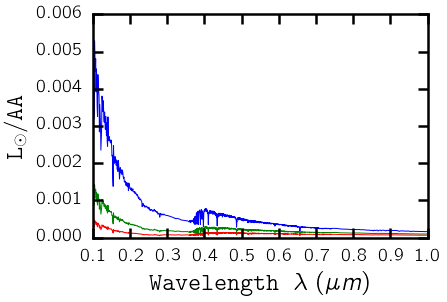

In [25]:
# reset parameters
for k in pop.params.all_params:
    pop.params[k] = default_params[k]
    
pop.params['sfh'] = 1
pop.params['tau'] = 1.
wave, space = pop.get_spectrum(tage=1., peraa=True)
plt.plot(wave/1e4, space)
wave, space = pop.get_spectrum(tage=2., peraa=True)
plt.plot(wave/1e4, space)
wave, space = pop.get_spectrum(tage=3., peraa=True)
plt.plot(wave/1e4, space)
plt.xlim([0.1, 1.0])
plt.xlabel('Wavelength $\lambda\; (\mu m)$', fontsize=25)
plt.ylabel('$\mathtt{L_\odot/AA}$', fontsize=25)

## Reverse engineering SEDfits from iSEDfit 
I'm going to use best-fit galaxy properties from SED fitting using iSEDfit in order to reproduce the observed magnitudes. 

**galaxy properites from iSEDfit:**
- From John Moustakas
- NSA galaxies

#### Galaxy 1 (iSEDfit ID 053999)
z = 0.0309

$log(M_*/M_\odot) = 9.16$

Age = 3.97 Gyr

$\tau$ = 1.0 Gyr

$Z/Z_\odot$ = 0.84

$A_{V, ISM}$ = 0.18 mag

$A_{V, BC}$ = 0.29 mag

$log {\rm SFR}$ = -0.77 $M_{\odot} yr^{-1}$

$log {\rm SFR}_{100}$ = -1.33 $M_{\odot} yr^{-1}$

$log b_{100}$ = -1.12 (*what is this?*)

In [26]:
# reset parameters
for k in pop.params.all_params:
    pop.params[k] = default_params[k]

In [29]:
pop.params['sfh'] = 1
pop.params['tau'] = 1.
pop.params['logzsol'] = 0.84
wave, space = pop.get_spectrum(tage=3.97, peraa=False)

In [40]:
mass = 10**9.16 / pop.stellar_mass
spec = mass*space

check out the spectrum

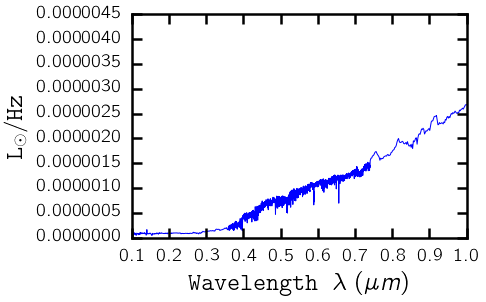

In [41]:
plt.plot(wave/1e4, spec)
plt.xlim([0.1, 1.0])
plt.xlabel('Wavelength $\lambda\; (\mu m)$', fontsize=25)
plt.ylabel('$\mathtt{L_\odot/Hz}$', fontsize=25)

In [42]:
d_lum = cosmo.luminosity_distance(0.0309).value
d_factor = (d_lum * 1e5)**2
a = (1. + 0.0309)

In [50]:
spec1 = spec * to_cgs * a / d_factor * lightspeed / wave**2 # in erg/s/cm^2/AA

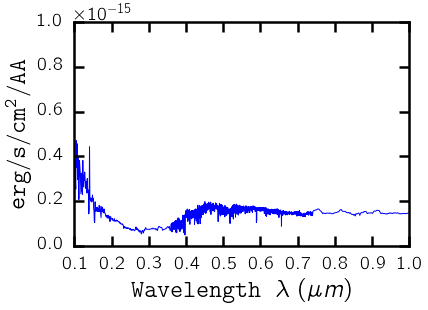

In [44]:
plt.plot(wave/1e4, spec1)
plt.xlim([0.1, 1.0])
plt.xlabel('Wavelength $\lambda\; (\mu m)$', fontsize=25)
plt.ylabel('$\mathtt{erg/s/cm^2/AA}$', fontsize=25)

In [51]:
spec2 = spec * to_cgs * a / d_factor / 1e3 / (3631 * 1e-26) # maggies

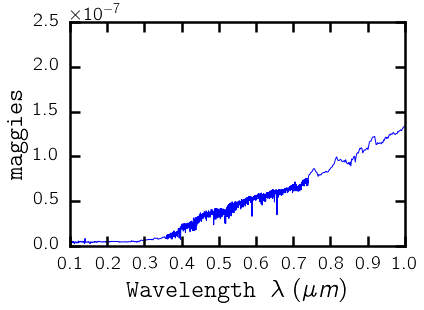

In [46]:
plt.plot(wave/1e4, spec2)
plt.xlim([0.1, 1.0])
plt.xlabel('Wavelength $\lambda\; (\mu m)$', fontsize=25)
plt.ylabel('maggies', fontsize=25)

In [53]:
spec3 = -2.5 * np.log10(spec2) # AB magnitude

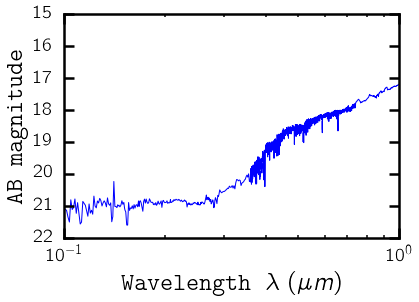

In [54]:
plt.plot(wave/1e4, spec3)
plt.xlim([0.1, 1.0])
plt.ylim([22, 15])
plt.xlabel('Wavelength $\lambda\; (\mu m)$', fontsize=25)
plt.ylabel('AB magnitude', fontsize=25)
plt.xscale("log")

SUCCESS!

#### Galaxy 2 (iSEDfit ID 053999)
z = 0.0316

$log(M_*/M_\odot) = 11.36$

Age = 7.65 Gyr

$\tau$ = 1.0 Gyr

$Z/Z_\odot$ = 1.31

$A_{V, ISM}$ = 1.20 mag

$A_{V, BC}$ = 1.05 mag

$log {\rm SFR}$ = 0.07 $M_{\odot} yr^{-1}$

$log {\rm SFR}_{100}$ = -0.80 $M_{\odot} yr^{-1}$

$log b_{100}$ = -2.51 (*what is this?*)

In [60]:
# reset parameters
for k in pop.params.all_params:
    pop.params[k] = default_params[k]
    
pop.params['sfh'] = 1
pop.params['tau'] = 1.
pop.params['logzsol'] = np.log10(1.31)
wave, space = pop.get_spectrum(tage=7.65, peraa=False)

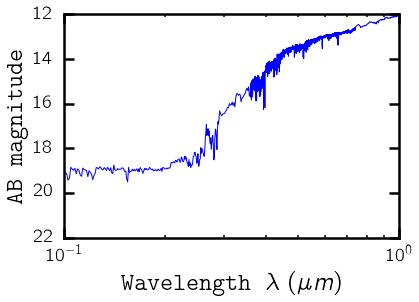

In [62]:
d_lum = cosmo.luminosity_distance(0.0316).value
d_factor = (d_lum * 1e5)**2
a = (1. + 0.0316)

mass = 10**11.36 / pop.stellar_mass
spec = mass*space
spec2 = spec * to_cgs * a / d_factor / 1e3 / (3631 * 1e-26) # maggies
spec3 = -2.5 * np.log10(spec2) # AB magnitude

plt.plot(wave/1e4, spec3)
plt.xlim([0.1, 1.0])
plt.ylim([22, 12])
plt.xlabel('Wavelength $\lambda\; (\mu m)$', fontsize=25)
plt.ylabel('AB magnitude', fontsize=25)
plt.xscale("log")

# calculate the magnitudes in SDSS filters

In [63]:
sdss_bands = fsps.find_filter('sdss')

In [64]:
# reset parameters
for k in pop.params.all_params:
    pop.params[k] = default_params[k]
    
#pop.params['compute_vega_mags'] = False
pop.params['sfh'] = 1
pop.params['tau'] = 1.
pop.params['logzsol'] = np.log10(0.84)
pop.params['zred'] = 0.0309
pop.params['dust_type'] = 2 
pop.params['dust2'] = 0.2
sdss_mags = pop.get_mags(tage=3.97, bands=sdss_bands)
print sdss_mags

[ 7.74683366  6.42485857  5.54583355  5.8683194   5.2416238 ]


In [70]:
w, spectra = pop.get_spectrum(tage=3.97, peraa=False)
mags = getSED(w, lightspeed/w**2 * spectra * to_cgs,  load_filters(['sdss_u0', 'sdss_g0', 'sdss_r0', 'sdss_i0', 'sdss_z0']))
mags0 = 10**9.16 * 10**(-0.4 * mags)

d_lum = cosmo.luminosity_distance(0.0316).value
d_factor = (d_lum * 1e5)**2
a = (1. + 0.0316)

maggies = mags0 * a / d_factor

In [72]:
print np.log10(mags0)
print -2.5*np.log10(maggies)

[ 6.06204586  6.5907927   6.8133685   6.94242155  7.06416508]
[ 20.52010969  19.19824258  18.64180307  18.31917046  18.01481163]


In [80]:
print -2.5*np.log10(10**9.16 * 10**(-0.4 * sdss_mags) * a / d_factor)
print -2.5*np.log10(10**9.16 * 10**(-0.4 * sdss_mags))

[ 20.522058    19.20008291  18.32105789  18.64354373  18.01684813]
[-15.15316634 -16.47514143 -17.35416645 -17.0316806  -17.6583762 ]


In [ ]:
plt.scatter([fsps.get_filter(filt).lambda_eff/1.e4 for filt in sdss_bands], sdss_mags)
plt.xlim([0.1, 1.0])
plt.xlabel('Wavelength $\lambda\; (\mu m)$', fontsize=25)

In [ ]:
print d_lum

In [ ]:
mu = 5. * np.log10(d_lum) - 5
print mu